In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


In [14]:
hdr1 = pd.read_csv(os.path.join(dirname, filename))

In [15]:
hdr1.columns = hdr1.columns.str.lower()
hdr1.head()

,gameid,bluewins,bluewardsplaced,bluewardsdestroyed,bluefirstblood,bluekills,bluedeaths,blueassists,blueelitemonsters,bluedragons,...,redtowersdestroyed,redtotalgold,redavglevel,redtotalexperience,redtotalminionskilled,redtotaljungleminionskilled,redgolddiff,redexperiencediff,redcspermin,redgoldpermin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [16]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(hdr1.iloc[:,:-1], 
                                                              hdr1['bluewins'], 
                                                              test_size=0.2, 
                                                              random_state=20)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=20)

In [26]:
# Create the scaler with object range of 0-1
scaler = MinMaxScaler()

# Fit and transform using the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test features
scaler.transform(X_valid)
scaler.transform(X_test)

array([[0.97347348, 0.        , 0.05306122, ..., 0.49162982, 0.49332344,
        0.45604396],
       [0.82075664, 0.        , 0.02857143, ..., 0.64292483, 0.59124629,
        0.71978022],
       [0.72917383, 1.        , 0.26122449, ..., 0.28774479, 0.34897379,
        0.46153846],
       ...,
       [0.99390625, 1.        , 0.04081633, ..., 0.40455885, 0.43045252,
        0.82967033],
       [0.77318154, 1.        , 0.02857143, ..., 0.49415666, 0.54729228,
        0.77472527],
       [0.97070234, 0.        , 0.04081633, ..., 0.53321752, 0.58592977,
        0.68681319]])

In [24]:
print(scaler.fit_transform(X_train))

[[0.66177629 0.         0.04081633 ... 0.57043588 0.57338032 0.60989011]
 [0.77145772 0.         0.09795918 ... 0.47646873 0.55965628 0.62087912]
 [0.95493769 0.         0.33061224 ... 0.65150558 0.57368942 0.66483516]
 ...
 [0.8824723  1.         0.03265306 ... 0.43609181 0.51953511 0.69230769]
 [0.93470472 0.         0.03673469 ... 0.51537166 0.53295005 0.68681319]
 [0.92142549 1.         0.05306122 ... 0.29953674 0.28400099 0.57142857]]


Text(0, 0.5, 'Coefficients')

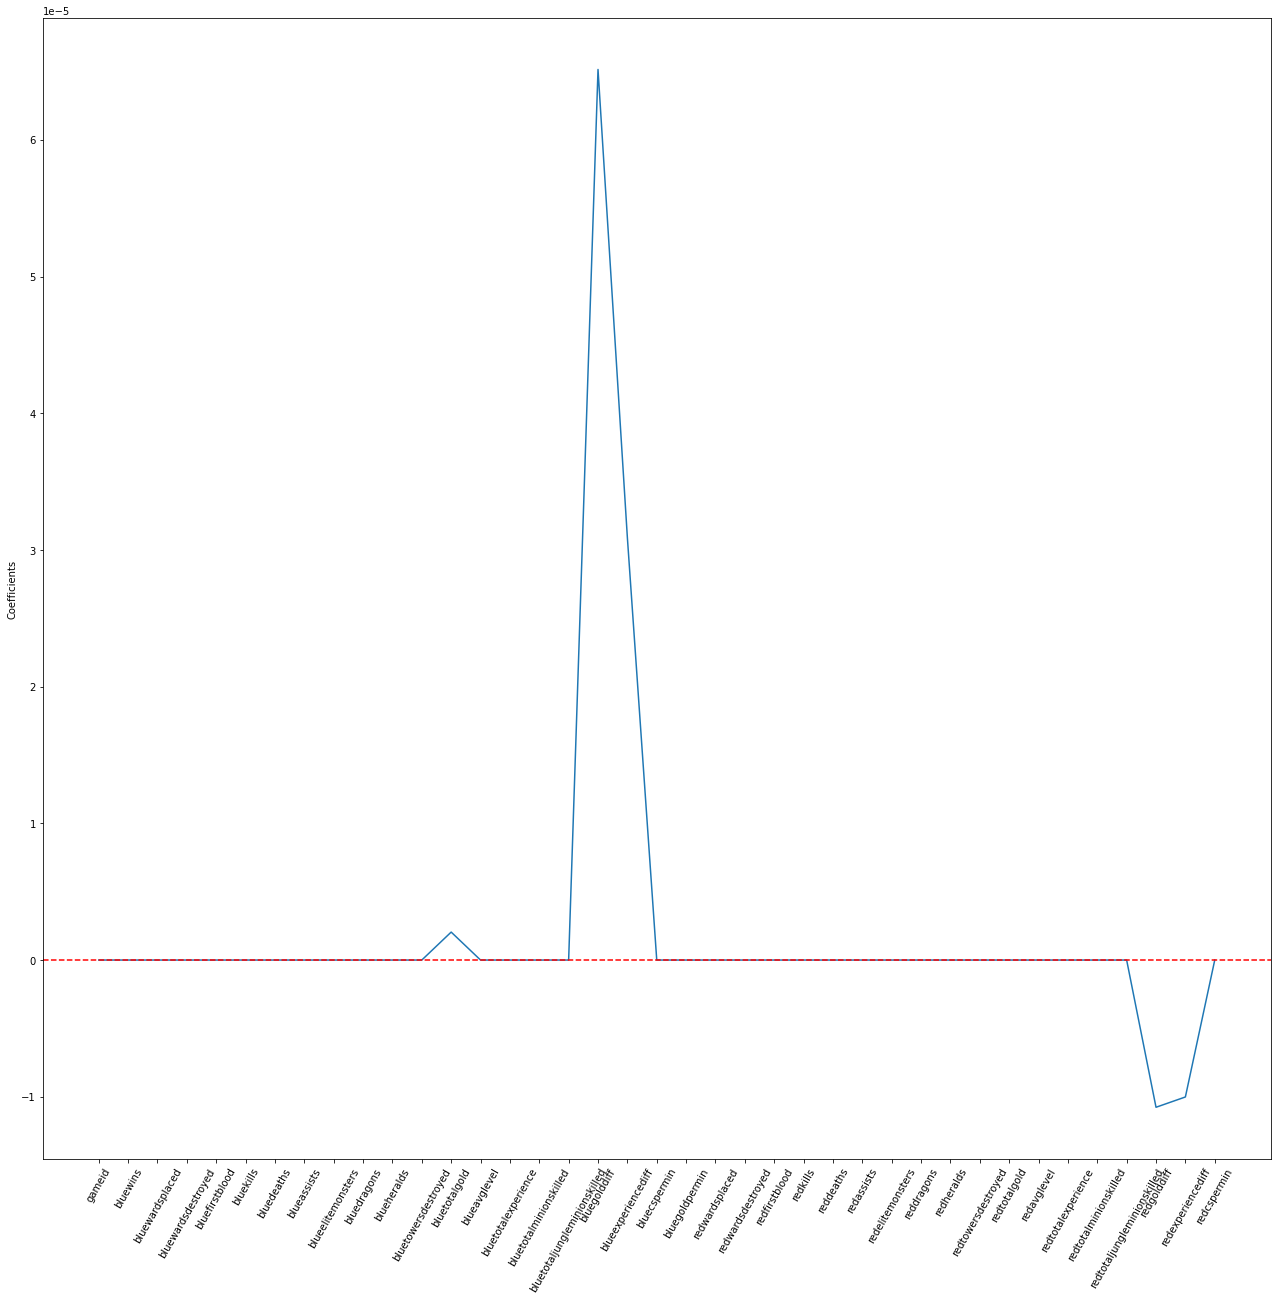

In [31]:
# Create the model
lasso = Lasso(alpha=1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Extract the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.figure(figsize=(22, 21))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')

In [ ]:
hdr1.info()

In [ ]:
hdr1.columns = hdr1.columns.str.lower()

In [ ]:
hdr2 = hdr1[{"bluewins","bluefirstblood","bluekills","redkills","bluewardsplaced","redwardsplaced","blueelitemonsters","redelitemonsters","bluetowersdestroyed","redtowersdestroyed","bluegolddiff","bluecspermin","redcspermin"}]

In [ ]:
hdr2.head()

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(hdr2.corr(), annot=True, cmap='coolwarm', fmt='.2g')